In [38]:
import os

# Check current working directory
print("Current Directory:", os.getcwd())

Current Directory: D:\AnushkaData\internship_liat\visionary_eyes\visionary-eyes


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths to all CSVs
csv_paths = {
    "YOLOv5": "./task2/output/identify.csv",
    "Color": "./task2/output/clrIdentify.csv",
    "ManualID": "./original_task2/output/manual_id_output.csv"
}

In [40]:
def avg_conf_per_frame(csv_path):
    df = pd.read_csv(csv_path)
    if 'confidence' not in df.columns or 'frame_id' not in df.columns:
        raise ValueError("CSV missing 'confidence' or 'frame_id' columns.")
    return df.groupby('frame_id')['confidence'].mean()

In [41]:
confidence_data = {}

for name, path in csv_paths.items():
    try:
        confidence_data[name] = avg_conf_per_frame(path)
    except Exception as e:
        print(f"Error loading {name}: {e}")


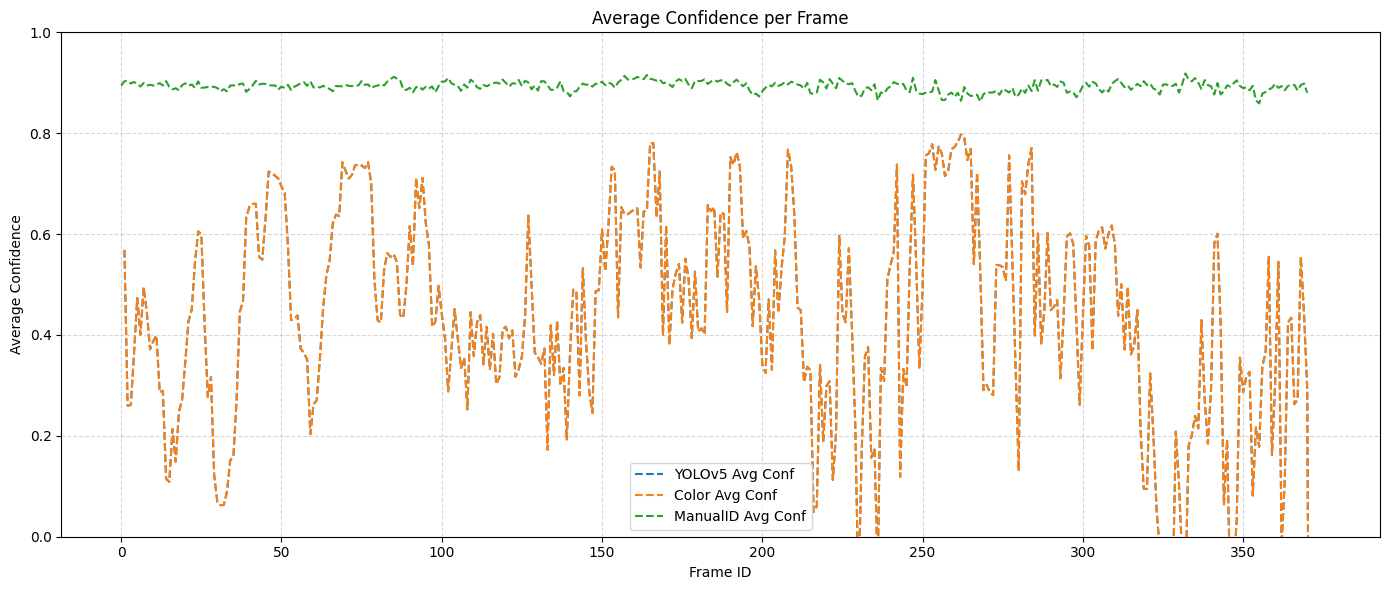

In [42]:
plt.figure(figsize=(14, 6))
for name, series in confidence_data.items():
    plt.plot(series.index, series.values, label=f"{name} Avg Conf", linestyle='--')

plt.title("Average Confidence per Frame")
plt.xlabel("Frame ID")
plt.ylabel("Average Confidence")
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()